# **Credit Card Fraud Detection Assignment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DL Assignments/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# checking if any missing values exist
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
# reset the indexes
df.reset_index(drop=True, inplace=True)
labels = df.pop('Class')

In [ ]:
df -= df.mean()
df /= df.std()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.137547e-15,-2.369347e-15,-9.299088e-17,6.265771e-15,1.966167e-16,1.757901e-15,-2.227124e-16,1.663279e-15,2.504277e-16,1.113356e-15,3.169574e-16,2.633087e-15,2.009085e-15,-9.906970e-16,-1.164815e-15,1.512182e-15,-8.075037e-19,6.119884e-16,1.391775e-15,-9.474671e-17,6.157864e-16,1.850826e-17,-2.630385e-15,-7.445328e-16,7.621335e-17,-1.055018e-15,-1.504105e-16,2.448796e-17,-3.725646e-17,2.278134e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,-2.258187e+01,-4.700120e+00,-1.869865e+01,-5.819382e+00,-2.004425e+01,-4.915182e+00,-1.612532e+01,-2.962640e+01,-1.133264e+01,-8.861386e+00,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,-4.917352e-01,-7.470211e-01,-4.058956e-01,-6.516187e-01,-4.439557e-01,-6.368121e-01,-5.341344e-01,-5.695599e-01,-5.951610e-01,-5.605359e-01,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,-8.533536e-02,-3.209262e-02,1.401445e-01,-1.363248e-02,5.278693e-02,5.251907e-02,7.579241e-02,-7.732590e-02,-4.338363e-03,4.588006e-03,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,4.168834e-01,7.245851e-01,6.187322e-01,6.656507e-01,5.144504e-01,7.088490e-01,5.971978e-01,4.705729e-01,5.974958e-01,5.637918e-01,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,2.180754e+01,1.177502e+01,7.854665e+00,7.160723e+00,1.098145e+01,9.699100e+00,1.976040e+01,1.089500e+01,6.014331e+00,6.869402e+00,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


In [ ]:
# split data into training(50%), validation(20%) and test(30%)
df_len = len(df)
train_data = df.iloc[:df_len*50//100]
val_data = df.iloc[df_len*50//100:df_len*70//100]
test_data = df.iloc[df_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [ ]:
# Model Architecture using tanh as activation function
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
model.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
model.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  MODEL = model.fit(train_data,train_labels,epochs=100,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/100
557/557 [==============================] - 5s 4ms/step - loss: 0.2657 - acc: 0.9175 - val_loss: 1.5036 - val_acc: 0.4926
Epoch 2/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0055 - acc: 0.9993 - val_loss: 1.7588 - val_acc: 0.5468
Epoch 3/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 1.7988 - val_acc: 0.5693
Epoch 4/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 1.6348 - val_acc: 0.6075
Epoch 5/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 1.5645 - val_acc: 0.6228
Epoch 6/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 1.2718 - val_acc: 0.6696
Epoch 7/100
557/557 [==============================] - 2s 3ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 1.2824 - val_acc: 0.6716
Epoch 8/100
557/557 [==============================] - 2s 3ms/step - 

In [ ]:
test_loss , test_acc = model.evaluate(test_data,test_labels)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.1091 - acc: 0.9650


In [ ]:
test_labels[test_labels == 1]


199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

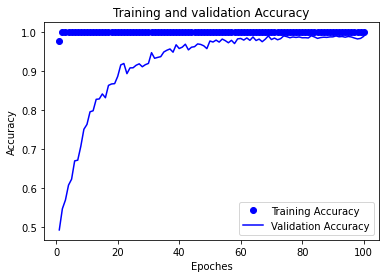

In [ ]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
# plt.show()

In [ ]:
# Model architecture using relu as activation function
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
model1 = models.Sequential()
model1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
model1.add(layers.Dense(20,activation="relu",input_shape=(data.shape[1],) ))
model1.add(layers.Dense(10,activation="relu",input_shape=(data.shape[1],) ))
model1.add(layers.Dense(1,activation="sigmoid"))
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  MODEL1 = model1.fit(train_data,train_labels,epochs=100,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/100
279/279 [==============================] - 2s 4ms/step - loss: 0.1927 - acc: 0.9700 - val_loss: 0.0098 - val_acc: 0.9992
Epoch 2/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0043 - acc: 0.9992 - val_loss: 0.0097 - val_acc: 0.9993
Epoch 3/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 0.0084 - val_acc: 0.9991
Epoch 4/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0103 - val_acc: 0.9985
Epoch 5/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0034 - acc: 0.9992 - val_loss: 0.0100 - val_acc: 0.9981
Epoch 6/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0140 - val_acc: 0.9961
Epoch 7/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0149 - val_acc: 0.9962
Epoch 8/100
279/279 [==============================] - 1s 3ms/step - 

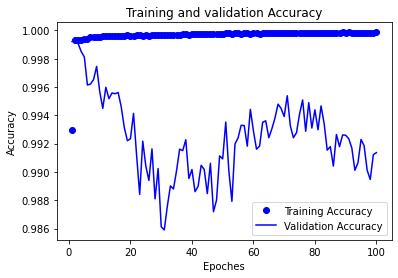

In [ ]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss , test_acc = model1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0308 - acc: 0.9932


In [ ]:
# Predictions
predict_test_data = test_data
prediction = model1.predict(predict_test_data)
hit = np.argmax(prediction) == np.array(test_labels)
print(f"{len(hit)} out of {len(prediction)} ")

85443 out of 85443 


In [ ]:
# Accuracy
print(f"{test_acc*100}%")

99.32469725608826%
